# Start Here

This is a basic Tidy3D script showing the FDTD simulation of a delectric cube in the presence of a point dipole.

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pylab as plt

import tidy3d as td
import tidy3d.web as web

Using Tidy3D credentials from stored file


In [2]:
# set up parameters of simulation (length scales are micrometers)
grid_size = 0.01
pml = td.PML()
sim_size = (4, 4, 4)
lambda0 = 1.0
freq0 = td.C_0 / lambda0
fwidth = freq0 / 10.0
run_time = 12.0 / fwidth

# create structure
dielectric = td.Medium.from_nk(n=2, k=0, freq=freq0)
square = td.Structure(
    geometry=td.Box(center=(0, 0, 0), size=(1.5, 1.5, 1.5)),
    medium=dielectric)

# create source
source = td.VolumeSource(
    center=(-1.5, 0, 0),
    size=(0, 0.4, 0.4),
    source_time = td.GaussianPulse(
        freq0=freq0,
        fwidth=fwidth),
    polarization='Ey')

# create monitor
monitor = td.FieldMonitor(
    fields=['Ex', 'Ey', 'Hz'],
    center=(0, 0, 0),
    size=(td.inf, td.inf, 0),
    freqs=[freq0],
    name='fields_on_plane')

# Initialize simulation
sim = td.Simulation(size=sim_size,
                    grid_size=(grid_size, grid_size, grid_size),
                    structures=[square],
                    sources=[source],
                    monitors=[monitor],
                    run_time=run_time,
                    pml_layers=(pml, pml, pml))

In [3]:
data = web.run(sim, task_name='quickstart', path='data/data.hdf5')

[15:38:26] INFO     Uploaded task 'quickstart' with task_id                     ]8;id=97358;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=924379;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#108\108]8;;\
                    'eaca8fff-ff2a-4c98-9745-82e3ab3e3f71'.

Output()

[15:38:27] status = queued                                                      ]8;id=208340;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=846950;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#200\200]8;;\

[15:38:39] status = preprocess                                                  ]8;id=319449;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=23147;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#200\200]8;;\

[15:38:58] status = running                                                     ]8;id=183610;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=719206;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#200\200]8;;\

[15:40:25] status = postprocess                                                 ]8;id=326085;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=171027;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#200\200]8;;\

[15:40:42] status = visualize                                                   ]8;id=240899;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=410061;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#200\200]8;;\

[15:41:13] status = success                                                     ]8;id=778155;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=935641;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#200\200]8;;\

[15:41:13] INFO     downloading file "monitor_data.hdf5" to "data/data.hdf5"    ]8;id=435079;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=688198;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#479\479]8;;\

Output()

Downloading... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00

[15:41:17] INFO     loading SimulationData from data/data.hdf5                  ]8;id=955822;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=419247;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#300\300]8;;\

           WARNING  Simulation final field decay value of 1.74e-05 is greater   ]8;id=586835;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=850983;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#307\307]8;;\
                    than the simulation shutoff threshold of 1e-05. Consider                 
                    simulation again with large run_time duration for more                   
                    accurate results.

In [4]:
print(data.log)

Simulation domain Nx, Ny, Nz: [420, 420, 420]
Applied symmetries: (0, 0, 0)
Number of computational grid points: 7.4088e+07.
Using subpixel averaging: True
Number of time steps: 1.9247e+04
Automatic shutoff factor: 1.00e-05
Time step (s): 1.7332e-17
Compute source modes time (s):     0.4206
Compute monitor modes time (s):    0.4339

Rest of setup time (s):            0.5478

Starting solver...
- Time step    769 / time 1.33e-14s (  4 % done), field decay: 1.00e+00
- Time step   1531 / time 2.65e-14s (  7 % done), field decay: 1.00e+00
- Time step   1539 / time 2.67e-14s (  8 % done), field decay: 1.00e+00
- Time step   2309 / time 4.00e-14s ( 12 % done), field decay: 2.52e-01
- Time step   3079 / time 5.34e-14s ( 16 % done), field decay: 6.69e-02
- Time step   3849 / time 6.67e-14s ( 20 % done), field decay: 2.67e-02
- Time step   4619 / time 8.01e-14s ( 24 % done), field decay: 1.17e-02
- Time step   5389 / time 9.34e-14s ( 28 % done), field decay: 9.21e-03
- Time step   6159 / time 1

<AxesSubplot:title={'center':'f = 2.998e+14 [Hz], z = 0 [um]'}, xlabel='x position [um]', ylabel='y position [um]'>

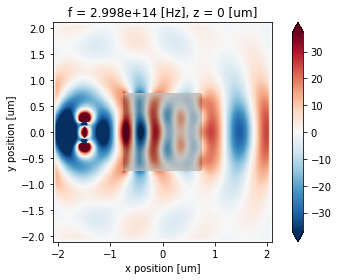

In [5]:
data.plot_field('fields_on_plane', 'Ey', freq=freq0, z=0)

In [6]:
web.get_info('eaca8fff-ff2a-4c98-9745-82e3ab3e3f71')

TaskInfo(execCount=1, s3Storage=57893181.0, userEmail=None, coreDuration=0.0, coreStartTime=None, rankCount=8, submitTime='2022:01:29:23:38:26', updateTime=None, status='success', taskParam=None, objectId='default', folderId='default', solverVersion='release-22.1.3', worker='cell2', userId='AIDAXWCOWJGJBISZJPJQZ', taskType='em', objectType='FDTD', taskName='quickstart', errorMessages=None, nodeSize=74088000, timeSteps=19247, computeWeight=712.985868, solverStartTime='2022:01:29:23:38:57', solverEndTime='2022:01:29:23:40:25', taskId='eaca8fff-ff2a-4c98-9745-82e3ab3e3f71', workerGroup=None, realCost=None, cloudInstanceSize=None, flow360InstanceSize=None, estCostMin=0.7557764278538881, estCostMax=1.8894410696347201, running=False, objectRefId=None, metdataProcessed=None, optSolverUnit=1.0, minSolverUnit=1.0, maxSolverUnit=4.0, coreStartTimeAsLong=-1.0, id='eaca8fff-ff2a-4c98-9745-82e3ab3e3f71', metadataProcessed=True, parentId=None, realWorkUnit=0.9447205348173601, refId=None, solverEndTimeAsLong=1643499625000.0, solverStartTimeAsLong=1643499537000.0, submitTimeAsLong=1643499506000.0, credential=False, loopSolverTime=72434, shutoffNt=19247, startSolverTime=1643499540218, totalSolverTime=75203)